# On-line Portfolio Selection Testing
### Imports

In [1]:
# IMPORTS
import os
import numpy as np
from utils.data import read_stock_history, normalize
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from model.benchmarks_olps import tools, algos
from model.benchmarks_olps.algos import *
from model.benchmarks_olps.result import AlgoResult, ListResult
from environment.portfolio import PortfolioEnv, MultiActionPortfolioEnv
from stock_trading import test_portfolio_selection, test_portfolio_selection_multiple, plot_weights, plot_portfolio_values, results_table, test_with_given_weights

print("Imports Complete!")







Imports Complete!


### Variables and configuration

In [2]:
window_length = 3

In [3]:
# Dataset
history, abbreviation, date_list = read_stock_history(filepath='utils/datasets/nyse_n.h5')
print("Dataset Shape: {}".format(history.shape))
print("Dataset Dates: {} -> {}".format(date_list[0], date_list[-1]))

Dataset Shape: (23, 6430, 2)
Dataset Dates: 02/01/1985 -> 30/06/2010


In [4]:
# Get Close
_history = history[:, :, :4]
# Target Stocks
target_stocks = abbreviation
# Target History
target_history = np.empty(shape=(len(target_stocks), _history.shape[1], _history.shape[2]))
for i, stock in enumerate(target_stocks):
    target_history[i] = _history[abbreviation.index(stock), :, :]

print("Assets: ", target_stocks)
print("Target History Sample: ", target_history[0][0])
print("Target History Shape: ", target_history.shape)

Assets:  ['ahp', 'alcoa', 'amer_brands', 'coke', 'comm_metals', 'dow_chem', 'Dupont', 'ford', 'ge', 'gm', 'hp', 'ibm', 'ingersoll', 'jnj', 'kimb-clark', 'kin_ark', 'Kodak', 'merck', 'mmm', 'morris', 'p_and_g', 'schlum', 'sher_will']
Target History Sample:  [0.99751    1.00742525]
Target History Shape:  (23, 6430, 2)


### Environment setup

In [5]:
# Training/Testing Date Range
full_length = len(date_list)
train_test_ratio = 6/7
train_start_date = date_list[window_length]
train_end_date = date_list[(int)(full_length * train_test_ratio)-1]
test_start_date = date_list[(int)(full_length * train_test_ratio)]
test_end_date = date_list[full_length-2]
print("Full Date Range: {} -> {} ({} Steps)".format(train_start_date, test_end_date, 
                                                    (int)(date_list.index(test_end_date) - date_list.index(train_start_date))))

Full Date Range: 07/01/1985 -> 29/06/2010 (6425 Steps)


In [6]:
# Set Up Environment
env = PortfolioEnv(target_history, target_stocks, date_list, trading_cost=0, start_date=train_start_date, 
                              end_date=test_end_date, window_length=window_length, olps=True)

/home/nigel/anaconda3/envs/tensor_keras_portfolio/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### Test Portfolio Selection

In [7]:
models = ['CRP', 'BCRP']#, 'OLMAR'#, 'PAMR', 'RMR', 'WMAMR', 'EG', 'ONS', 'UP']
observations_list, portfolio_values_list, weights_list, dates = test_portfolio_selection_multiple(env, models)

=========CRP=========
len(weights_array): 6430
=========BCRP=========
252.0
len(weights_array): 6426


In [8]:
len(env.close_df)

6430

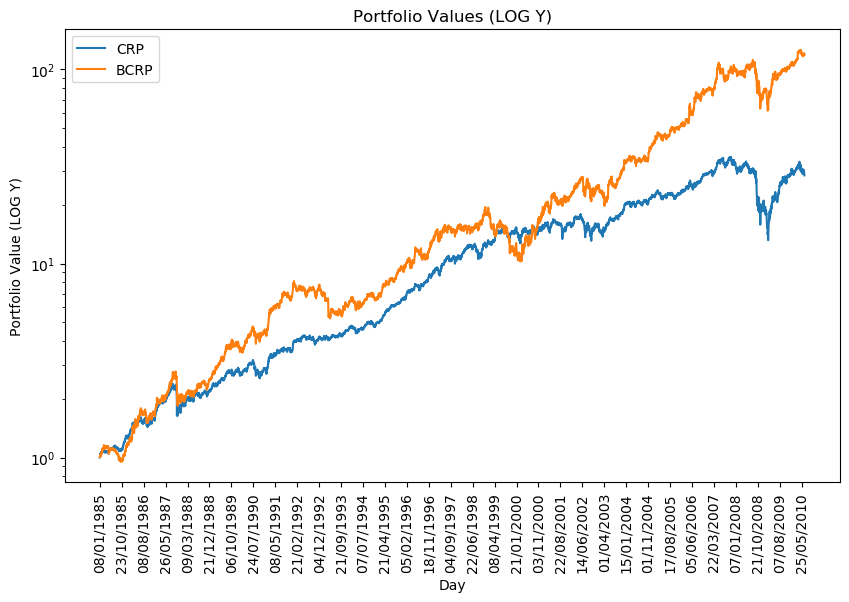

In [9]:
plot_portfolio_values(models, portfolio_values_list, dates)

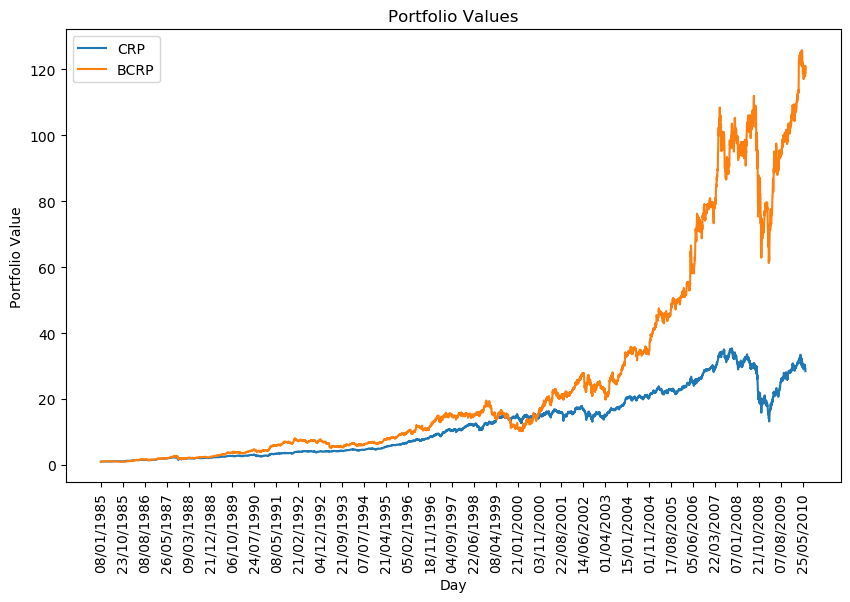

In [10]:
plot_portfolio_values(models, portfolio_values_list, dates, log_y=False)

In [11]:
results_table(models, portfolio_values_list)

,Portfolio,Average Daily Yield (%),Sharpe Ratio (%),Sortino Ratio (%),Maximum Drawdown (%),Final Portfolio Value
0,CRP,0.0588,5.0911,6.2991,62.6889,28.462
1,BCRP,0.0863,5.5680,7.8224,47.6001,118.981


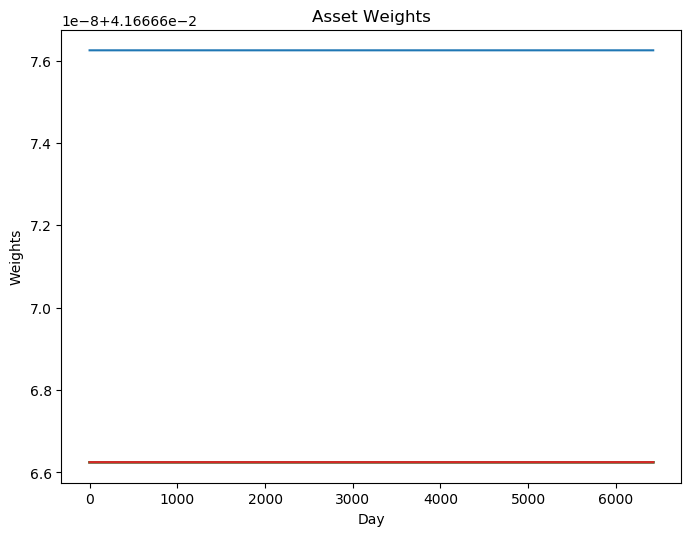

In [12]:
plot_weights(weights_list[0])

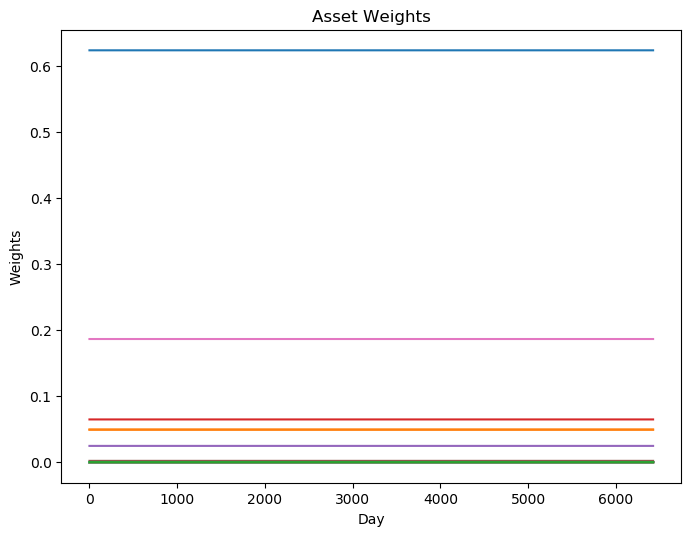

In [13]:
plot_weights(weights_list[1])

In [14]:
_, _, olps_portfolio_values, _, _ = test_with_given_weights(env, weights_list[1])

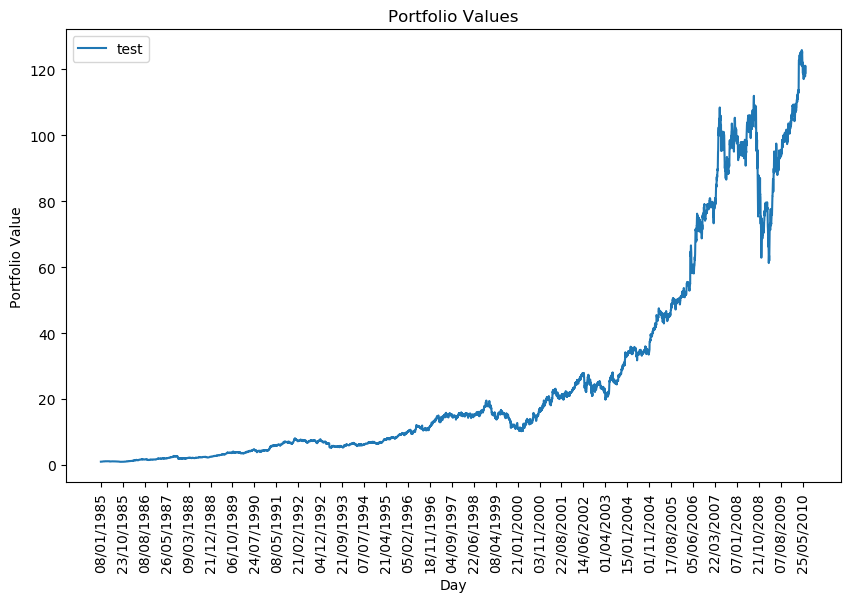

In [15]:
plot_portfolio_values(['test'], [olps_portfolio_values], dates, log_y=False)

In [16]:
_, _, olps_portfolio_values, _, _ = test_with_given_weights(env, weights_list[0])

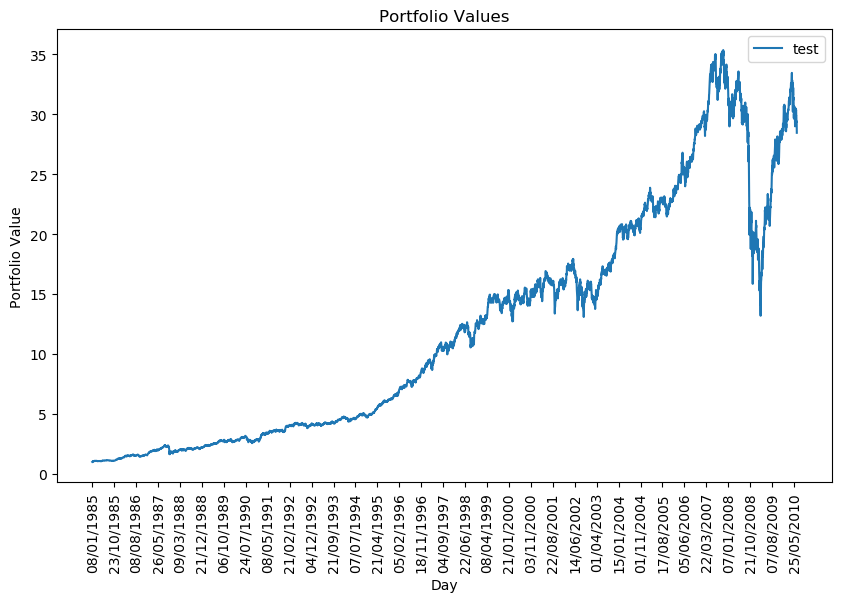

In [17]:
plot_portfolio_values(['test'], [olps_portfolio_values], dates, log_y=False)